# RLab05 - Gabriele Bertinelli (1219907 - tri)

In [1]:
#install.packages('gridExtra')

#library(rjags)
#library(coda)
library(tidyverse)
library(gridExtra)

#install.packages('emdbook')
#install.packages('ramify')

library(emdbook)
library(ramify)
library(latex2exp)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘ramify’


The following object is masked from ‘package:purrr’:

    flatten


The following object is masked from ‘package:tidyr’:

    fill


The following object is masked from ‘package:graphics’:

    clip




# 1)

## 1.1)

In [4]:
# sets of observations
n1 <- c(rep(0, times=109), rep(1, times = 65), rep(2, times=22), rep(3, times=3), rep(4, times=1))
n2 <- c(rep(0, times=144), rep(1, times = 91), rep(2, times=32), rep(3, times=11), rep(4, times=2))

delta.t <- 0.001
lambda_list <- seq(from=0, to=10, by=delta.t)

#likelihood for the two observation is poisson
poisson <- function(ni, lambda_list){
            pi_like <- 1 #rep(1, times = length(lambda_list))
            for (n in ni){
                pi_like <- pi_like * dpois(x=n, lambda=lambda_list)
                }
            return(pi_like)
            }

#compute the two likelihood separatly for the two observation
p1_like <- poisson(n1,  lambda_list)
p2_like <- poisson(n2,  lambda_list)


#plot
#plot_like1 <- ggplot() +
#        geom_line(aes(lambda_list, p1_like, color='1st set')) +
#        labs(x='Death', y='Likelihood', title='cazzi')

#plot_like2 <- ggplot() +
#        geom_line(aes(lambda_list, p2_like, color='2nd set')) +
#        labs(x='Death', y='Likelihood', title='culi')

#grid.arrange(grobs=list(plot_like1, plot_like2), nrow=2)

,mean,variance,lower_bound_credibility_interval,upper_bound_credibility_interval
,<dbl>,<dbl>,<dbl>,<dbl>
1st set,0.6150000,0.003075000,0.508,0.724
2nd set,0.7035714,0.002512755,0.607,0.802


Warning message:
“Removed 9250 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 9250 rows containing missing values (`geom_line()`).”


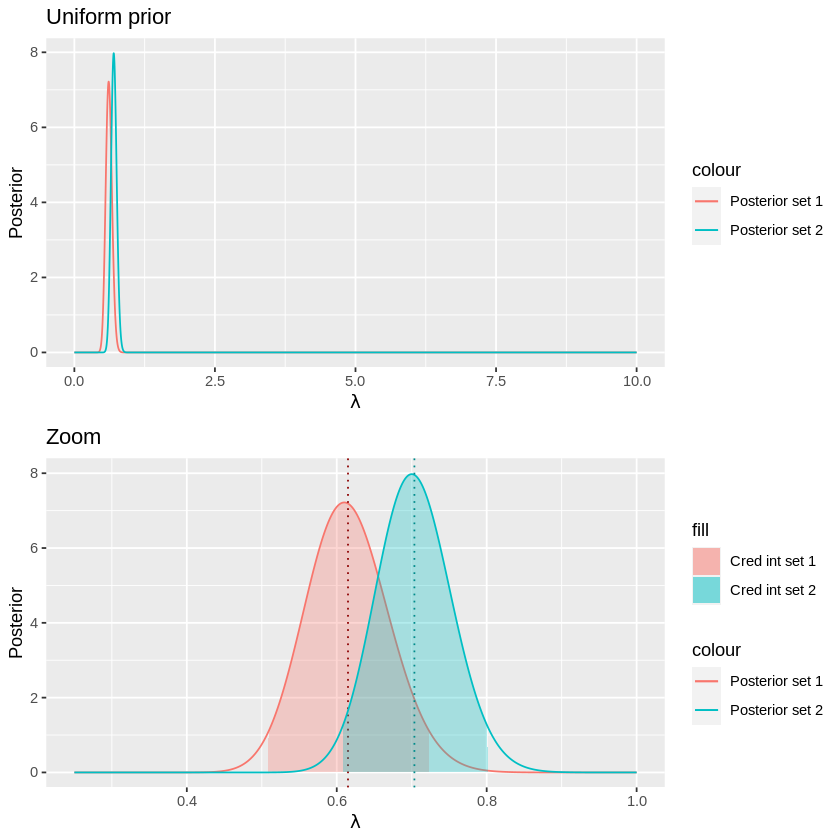

In [3]:
# posterior with uniform prior
p.post_star_unif1 <- p1_like * 1
p.post_unif1 <- p.post_star_unif1 / (sum(p.post_star_unif1)*delta.t)
mean_unif1 <- sum(p.post_unif1 * lambda_list)*delta.t
variance_unif1 <- sum(((mean_unif1-lambda_list)^2)*p.post_unif1)*delta.t
lower_unif1 <- ncredint(lambda_list, p.post_unif1, level = 0.95)[['lower']]
upper_unif1 <- ncredint(lambda_list, p.post_unif1, level = 0.95)[['upper']]


p.post_star_unif2 <- p2_like * 1 
p.post_unif2 <- p.post_star_unif2 / (sum(p.post_star_unif2)*delta.t)
mean_unif2 <- sum(p.post_unif2 * lambda_list)*delta.t
variance_unif2 <- sum(((mean_unif2-lambda_list)^2)*p.post_unif2)*delta.t
lower_unif2 <- ncredint(lambda_list, p.post_unif2, level = 0.95)[['lower']]
upper_unif2 <- ncredint(lambda_list, p.post_unif2, level = 0.95)[['upper']]


result_unif <- data.frame(
                mean = c(mean_unif1, mean_unif2), 
                variance = c(variance_unif1, variance_unif2),
                lower_bound_credibility_interval = c(lower_unif1, lower_unif2),
                upper_bound_credibility_interval = c(upper_unif1, upper_unif2),
                row.names = c('1st set', '2nd set')
                )
result_unif


# plot
plot_posterior_unif <- ggplot() +
        geom_line(aes(lambda_list, p.post_unif1, color='Posterior set 1')) +
        geom_line(aes(lambda_list, p.post_unif2, color='Posterior set 2')) +
        labs(x=(TeX('$\\lambda$')),y ='Posterior', title='Uniform prior')

# zoom in plot
plot_posterior_unif_zoom <- ggplot() +
        geom_line(aes(lambda_list, p.post_unif1, color='Posterior set 1')) + 
        geom_area(aes(x = lambda_list[lambda_list > lower_unif1 & lambda_list < upper_unif1], 
                      y = p.post_unif1[lambda_list > lower_unif1 & lambda_list < upper_unif1],
                      fill='Cred int set 1'), alpha=0.3) +
        geom_vline(aes(xintercept=mean_unif1), color='darkRed', linetype='dotted')+


        geom_line(aes(lambda_list, p.post_unif2, color='Posterior set 2')) + 
        geom_area(aes(x = lambda_list[lambda_list > lower_unif2 & lambda_list < upper_unif2], 
                      y = p.post_unif2[lambda_list > lower_unif2 & lambda_list < upper_unif2],
                      fill='Cred int set 2'), alpha=0.3) +
        geom_vline(aes(xintercept=mean_unif2), color='darkCyan', linetype='dotted') +

        labs(x=(TeX('$\\lambda$')), y ='Posterior', title='Zoom') +
        ylim(0, 8) +
        xlim(0.25, 1)

grid.arrange(grobs=list(plot_posterior_unif, plot_posterior_unif_zoom))

## 1.2)

,mean,variance,lower_bound_credibility_interval,upper_bound_credibility_interval
,<dbl>,<dbl>,<dbl>,<dbl>
1st set,0.6125000,0.003062500,0.5061,0.7211
2nd set,0.7017857,0.002506378,0.6051,0.8001


Warning message:
“Removed 9250 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 9250 rows containing missing values (`geom_line()`).”


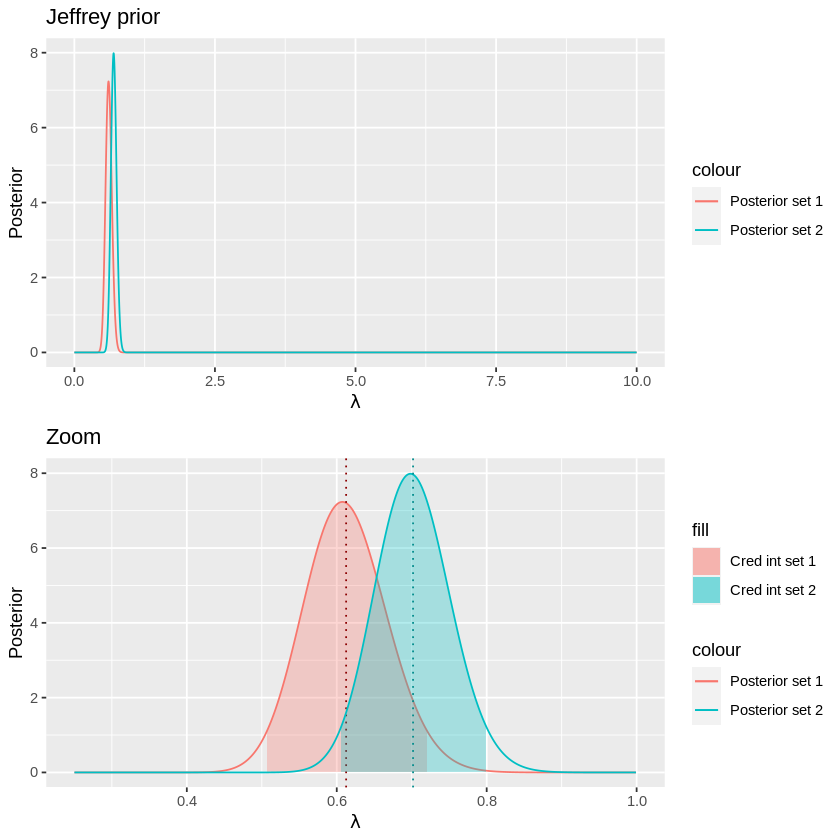

In [4]:
#posterior with Jeffrey prior
lambda_list <- seq(from=0.0001, to=10, by=delta.t)
p1_like <- poisson(n1,  lambda_list)
p2_like <- poisson(n2,  lambda_list)


p.post_star_Jeffrey1 <- p1_like * (1/sqrt(lambda_list))
p.post_Jeffrey1 <- p.post_star_Jeffrey1 / (sum(p.post_star_Jeffrey1)*delta.t)
mean_Jeffrey1 <- sum(p.post_Jeffrey1 * lambda_list)*delta.t
variance_Jeffrey1 <- sum(((mean_Jeffrey1-lambda_list)^2)*p.post_Jeffrey1)*delta.t
lower_Jeffrey1 <- ncredint(lambda_list, p.post_Jeffrey1, level = 0.95)[['lower']]
upper_Jeffrey1 <- ncredint(lambda_list, p.post_Jeffrey1, level = 0.95)[['upper']]


p.post_star_Jeffrey2 <- p2_like * (1/sqrt(lambda_list)) 
p.post_Jeffrey2 <- p.post_star_Jeffrey2 / (sum(p.post_star_Jeffrey2)*delta.t)
mean_Jeffrey2 <- sum(p.post_Jeffrey2 * lambda_list)*delta.t
variance_Jeffrey2 <- sum(((mean_Jeffrey2-lambda_list)^2)*p.post_Jeffrey2)*delta.t
lower_Jeffrey2 <- ncredint(lambda_list, p.post_Jeffrey2, level = 0.95)[['lower']]
upper_Jeffrey2 <- ncredint(lambda_list, p.post_Jeffrey2, level = 0.95)[['upper']]


result_unif <- data.frame(
                mean = c(mean_Jeffrey1, mean_Jeffrey2), 
                variance = c(variance_Jeffrey1, variance_Jeffrey2),
                lower_bound_credibility_interval = c(lower_Jeffrey1, lower_Jeffrey2),
                upper_bound_credibility_interval = c(upper_Jeffrey1, upper_Jeffrey2),
                row.names = c('1st set', '2nd set')
                )
result_unif


#plot
plot_posterior_Jeffrey <- ggplot() +
        geom_line(aes(lambda_list, p.post_Jeffrey1, color='Posterior set 1')) +
        geom_line(aes(lambda_list, p.post_Jeffrey2, color='Posterior set 2')) +
        labs(x=(TeX('$\\lambda$')), y ='Posterior', title='Jeffrey prior')

plot_posterior_Jeffrey_zoom <- ggplot() +
geom_line(aes(lambda_list, p.post_Jeffrey1, color='Posterior set 1')) + 
geom_area(aes(x = lambda_list[lambda_list > lower_Jeffrey1 & lambda_list < upper_Jeffrey1], 
              y = p.post_Jeffrey1[lambda_list > lower_Jeffrey1 & lambda_list < upper_Jeffrey1],
              fill='Cred int set 1'), alpha=0.3) +
geom_vline(aes(xintercept=mean_Jeffrey1), color='darkRed', linetype='dotted')+


geom_line(aes(lambda_list, p.post_Jeffrey2, color='Posterior set 2')) + 
geom_area(aes(x = lambda_list[lambda_list > lower_Jeffrey2 & lambda_list < upper_Jeffrey2], 
              y = p.post_Jeffrey2[lambda_list > lower_Jeffrey2 & lambda_list < upper_Jeffrey2],
              fill='Cred int set 2'), alpha=0.3) +
geom_vline(aes(xintercept=mean_Jeffrey2), color='darkCyan', linetype='dotted') +

labs(x=(TeX('$\\lambda$')), y ='Posterior', title='Zoom') +
ylim(0, 8) +
xlim(0.25, 1)

grid.arrange(grobs=list(plot_posterior_Jeffrey, plot_posterior_Jeffrey_zoom))

# 2)

## a)

In [23]:
#data
data1 <- NULL
data1$X <- n1

data2 <- NULL
data2$X <- n2


#create the jags model 
model <- 's11_inf_p_lambda_pred_unif.bug'
jm1 <- jags.model(model, data1)
jm2 <- jags.model(model, data2)

#update the Markov chain (burn-in) and plot
update(jm1, 1000)
chain1 <- coda.samples(jm1, c('lambda','Y'), n.iter=10000)

update(jm2, 1000)
chain2 <- coda.samples(jm2, c('lambda', 'Y'), n.iter=10000)

cat(paste('Chain 1 summary'))
print(summary(chain1))

cat(paste('\n\n\nChain 2 summary'))
print(summary(chain2))

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 200
   Unobserved stochastic nodes: 2
   Total graph size: 203

Initializing model

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 280
   Unobserved stochastic nodes: 2
   Total graph size: 283

Initializing model

Chain 1 summary
Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

         Mean     SD Naive SE Time-series SE
Y      0.6140 0.7969 0.007969      0.0079691
lambda 0.6143 0.0553 0.000553      0.0005378

2. Quantiles for each variable:

        2.5%   25%    50%    75%  97.5%
Y      0.000 0.000 0.0000 1.0000 3.0000
lambda 0.511 0.576 0.6122 0.6503 0.7267




Chain 2 summary
Iterations = 1001:11000
Thinning interval = 1 
Number of ch

Set 1: 
Mean set 1:  0.6143 
variance set 1:  0.00305809 
Median set 1: 0.6122 


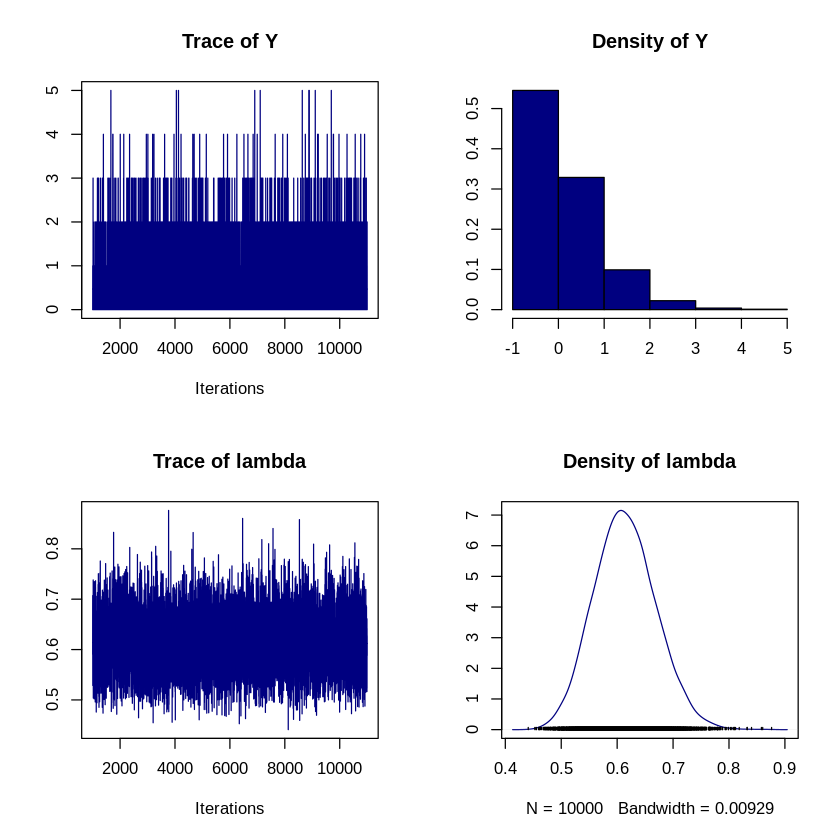

In [24]:
#plot and summaries for set 1
mean_set1 <- 0.6143
var_set1 <- 0.0553**2
median_set1 <- 0.6122

cat('Set 1:', '\n')
cat('Mean set 1: ', mean_set1, '\n')
cat('variance set 1: ', var_set1, '\n')
cat('Median set 1:', median_set1, '\n')

plot(chain1, col='navy')

Set 2: 
Mean set 2:  0.7035 
variance set 2:  0.002555302 
Median set 2: 0.7026 


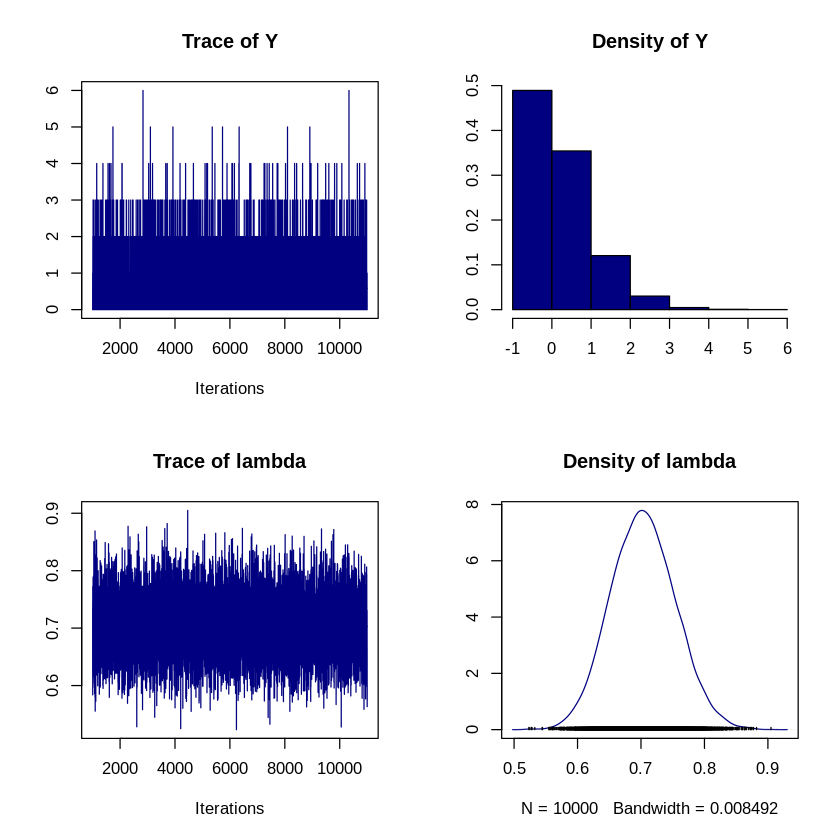

In [25]:
#plot and summaries for set 2
mean_set2 <- 0.7035
var_set2 <- 0.05055**2
median_set2 <- 0.7026

cat('Set 2:', '\n')
cat('Mean set 2: ', mean_set2, '\n')
cat('variance set 2: ', var_set2, '\n')
cat('Median set 2:', median_set2, '\n')

plot(chain2, col='navy')

,mean,variance,median,lower_bound_credibility_interval,upper_bound_credibility_interval
Set 1,0.6143,0.003058090,0.6122,0.5108429,0.7266610
Set 2,0.7035,0.002555302,0.7026,0.6071185,0.8038155


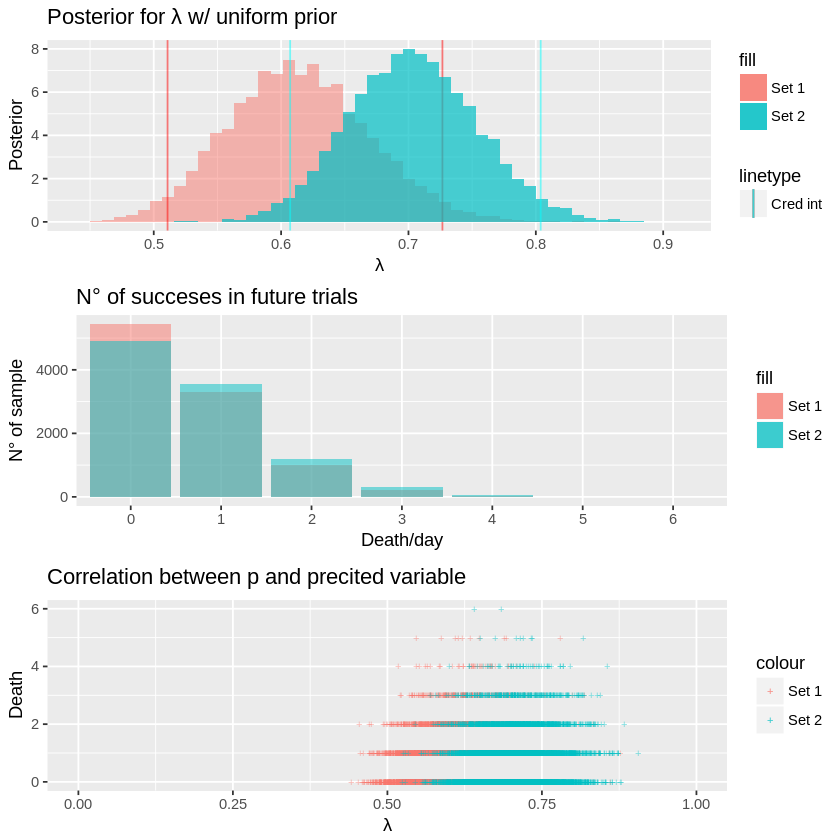

In [26]:
chain1.df <- as.data.frame(as.mcmc(chain1))
chain2.df <- as.data.frame(as.mcmc(chain2))

#95% credibility interval
sorted_chain1 <- chain1.df[order(chain1.df$lambda),]$lambda
MCMC1_low <- as.double(sorted_chain1[250]) 
MCMC1_up <- as.double(sorted_chain1[9750])

sorted_chain2 <- chain2.df[order(chain2.df$lambda),]$lambda
MCMC2_low <- as.double(sorted_chain2[250]) 
MCMC2_up <- as.double(sorted_chain2[9750])

results_unif <- data.frame(
            mean=c(mean_set1, mean_set2),
            variance=c(var_set1, var_set2),
            median=c(median_set1, median_set2),
            lower_bound_credibility_interval = c(MCMC1_low, MCMC2_low),
            upper_bound_credibility_interval = c(MCMC1_up, MCMC2_up), 
            row.names = c('Set 1', 'Set 2')
            )
results_unif

#p inference result 
plot_inference_p <- ggplot()+
        geom_histogram(aes(x=chain1.df$lambda, y=..density.., fill='Set 1'), alpha=0.5, bins=50)+
        geom_vline(aes(xintercept=MCMC1_low, linetype='Cred int'), color='red', alpha=0.5)+
        geom_vline(aes(xintercept=MCMC1_up, linetype='Cred int'), color='red', alpha=0.5)+
        geom_histogram(aes(x=chain2.df$lambda, y=..density.., fill='Set 2'), alpha=0.7, bins=50)+
        geom_vline(aes(xintercept=MCMC2_low, linetype='Cred int'), color='cyan', alpha=0.5)+
        geom_vline(aes(xintercept=MCMC2_up, linetype='Cred int'), color='cyan', alpha=0.5)+
        labs(x='λ', y='Posterior', title='Posterior for λ w/ uniform prior')

# next data prediction probability
ty1 <- as.data.frame(table(chain1.df$Y))
ty2 <- as.data.frame(table(chain2.df$Y))

plot_next_data_prediction <- ggplot()+
        geom_bar(aes(x = ty1$Var1, y=ty1$Freq, fill='Set 1'), alpha=0.5, stat = 'identity')+
        geom_bar(aes(x = ty2$Var1, y=ty2$Freq, fill='Set 2'), alpha=0.5, stat = 'identity')+
        labs(x='Death/day', y='N° of sample', title=sprintf('N° of succeses in future trials'))

#Correlation between p and predicted variable
 plot_correlations <- ggplot()+
        geom_point(aes(x=chain1.df$lambda, y=chain1.df$Y, color='Set 1'), shape='+', size=2, alpha=0.5)+
        geom_point(aes(x=chain2.df$lambda, y=chain2.df$Y, color='Set 2'), shape='+', size=2, alpha=0.5)+
        xlim(0, 1)+
        labs(x='λ', y='Death', title ='Correlation between p and precited variable')

grid.arrange(grobs=list(plot_inference_p, plot_next_data_prediction, plot_correlations), nrow=3)

## b)

In [27]:
#create the jags model 
model <- 's11_inf_p_lambda_pred_Jeffrey.bug'
jm1 <- jags.model(model, data1)
jm2 <- jags.model(model, data2)

#update the Markov chain (burn-in) and plot
update(jm1, 1000)
chain1 <- coda.samples(jm1, c('lambda','Y'), n.iter=10000)

update(jm2, 1000)
chain2 <- coda.samples(jm2, c('lambda', 'Y'), n.iter=10000)

cat(paste('Chain 1 summary'))
print(summary(chain1))

cat(paste('\n\n\nChain 2 summary'))
print(summary(chain2))

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 200
   Unobserved stochastic nodes: 2
   Total graph size: 204

Initializing model

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 280
   Unobserved stochastic nodes: 2
   Total graph size: 284

Initializing model

Chain 1 summary
Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

         Mean      SD  Naive SE Time-series SE
Y      0.6082 0.78686 0.0078686      0.0078686
lambda 0.6096 0.05567 0.0005567      0.0005567

2. Quantiles for each variable:

         2.5%    25%   50%    75%  97.5%
Y      0.0000 0.0000 0.000 1.0000 2.0000
lambda 0.5071 0.5706 0.608 0.6462 0.7234




Chain 2 summary
Iterations = 1001:11000
Thinning interval = 1 
Num

Set 1: 
Mean set 1:  0.6096 
variance set 1:  0.003099149 
Median set 1: 0.608 


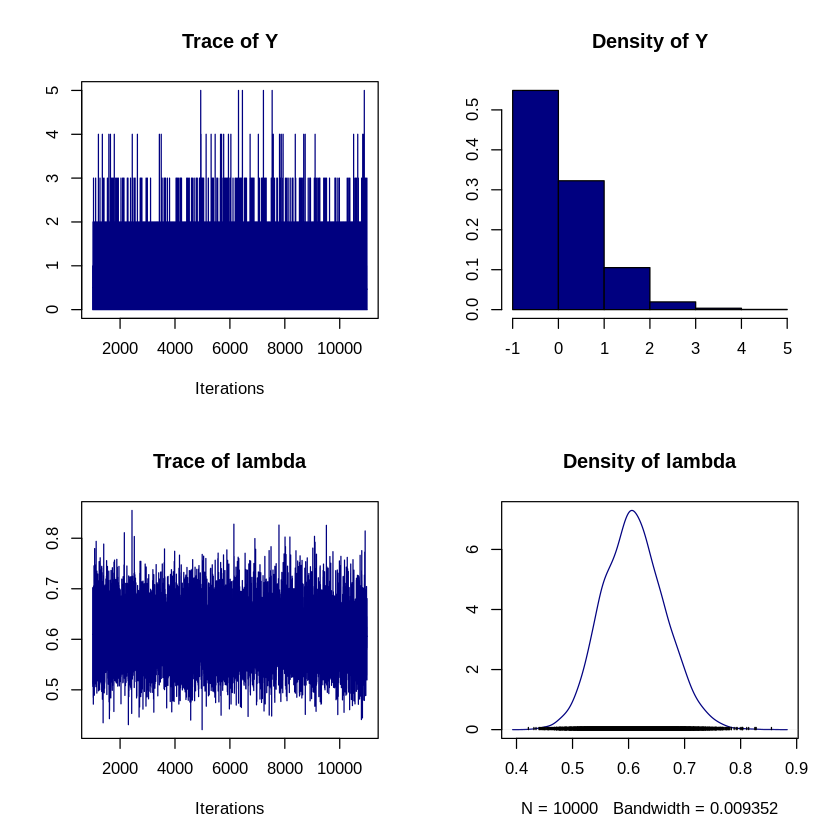

In [28]:
#plot and summaries for set 1
mean_set1 <- 0.6096
var_set1 <- 0.05567**2
median_set1 <- 0.6080

cat('Set 1:', '\n')
cat('Mean set 1: ', mean_set1, '\n')
cat('variance set 1: ', var_set1, '\n')
cat('Median set 1:', median_set1, '\n')

plot(chain1, col='navy')

Set 2: 
Mean set 2:  0.6997 
variance set 2:  0.00246016 
Median set 2: 0.6982 


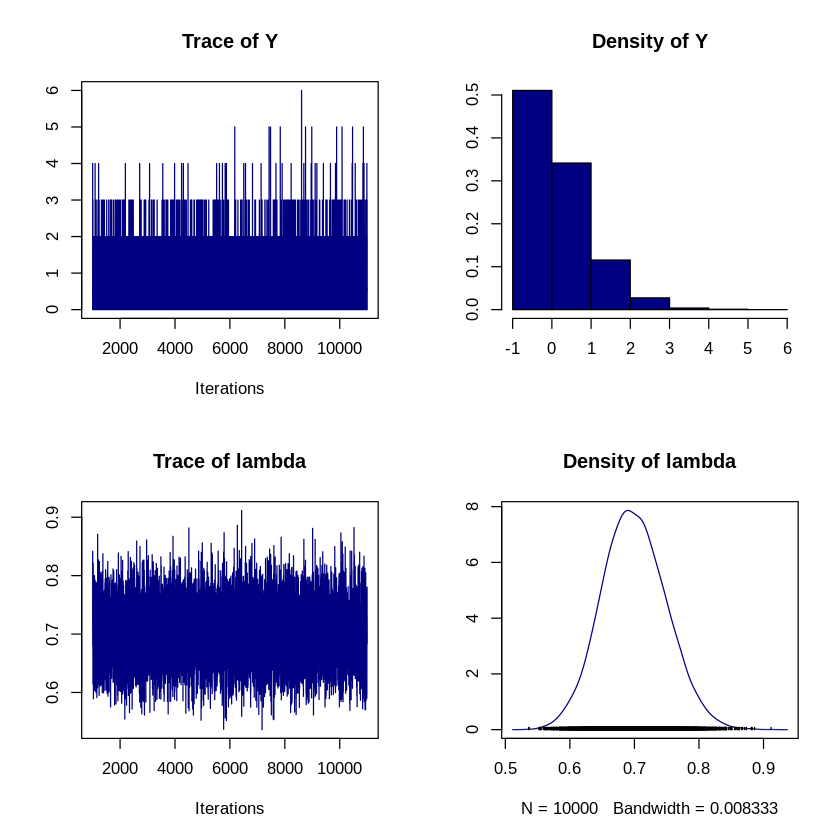

In [29]:
#plot and summaries for set 2
mean_set2 <- 0.6997
var_set2 <- 0.0496**2
median_set2 <- 0.6982

cat('Set 2:', '\n')
cat('Mean set 2: ', mean_set2, '\n')
cat('variance set 2: ', var_set2, '\n')
cat('Median set 2:', median_set2, '\n')

plot(chain2, col='navy')

,mean,variance,median,lower_bound_credibility_interval,upper_bound_credibility_interval
Set 1,0.6096,0.003099149,0.6080,0.5068257,0.7234470
Set 2,0.6997,0.002460160,0.6982,0.6048557,0.7997428


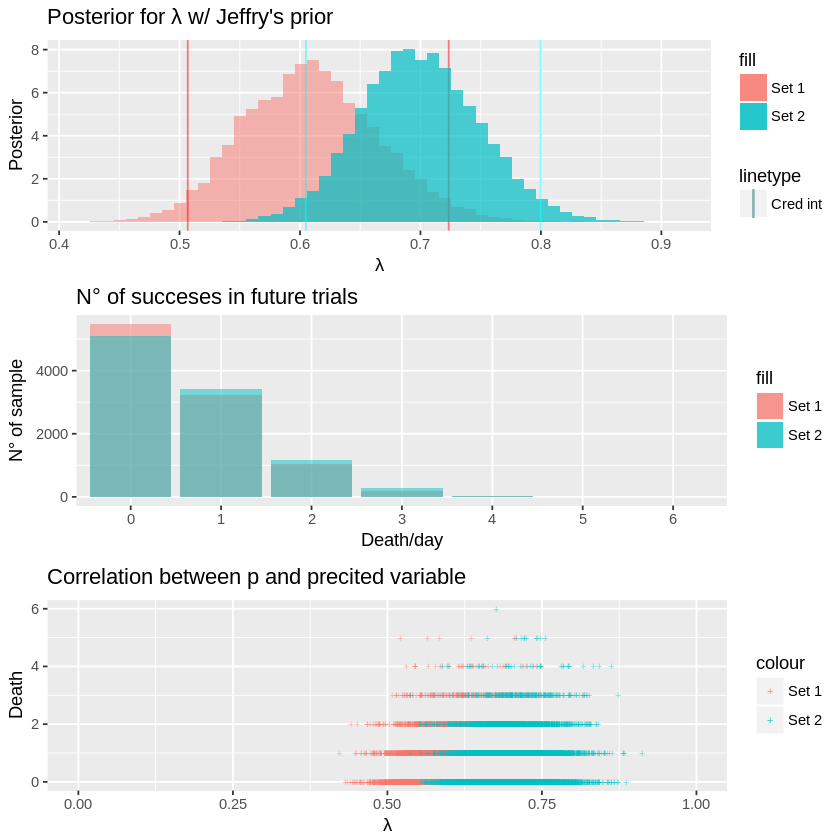

In [30]:
chain1.df <- as.data.frame(as.mcmc(chain1))
chain2.df <- as.data.frame(as.mcmc(chain2))

#95% credibility interval
sorted_chain1 <- chain1.df[order(chain1.df$lambda),]$lambda
MCMC1_low <- as.double(sorted_chain1[250]) 
MCMC1_up <- as.double(sorted_chain1[9750])

sorted_chain2 <- chain2.df[order(chain2.df$lambda),]$lambda
MCMC2_low <- as.double(sorted_chain2[250]) 
MCMC2_up <- as.double(sorted_chain2[9750])

results_unif <- data.frame(
            mean=c(mean_set1, mean_set2),
            variance=c(var_set1, var_set2),
            median=c(median_set1, median_set2),
            lower_bound_credibility_interval = c(MCMC1_low, MCMC2_low),
            upper_bound_credibility_interval = c(MCMC1_up, MCMC2_up), 
            row.names = c('Set 1', 'Set 2')
            )
results_unif

#p inference result 
plot_inference_p <- ggplot()+
        geom_histogram(aes(x=chain1.df$lambda, y=..density.., fill='Set 1'), alpha=0.5, bins=50)+
        geom_vline(aes(xintercept=MCMC1_low, linetype='Cred int'), color='red', alpha=0.5)+
        geom_vline(aes(xintercept=MCMC1_up, linetype='Cred int'), color='red', alpha=0.5)+
        geom_histogram(aes(x=chain2.df$lambda, y=..density.., fill='Set 2'), alpha=0.7, bins=50)+
        geom_vline(aes(xintercept=MCMC2_low, linetype='Cred int'), color='cyan', alpha=0.5)+
        geom_vline(aes(xintercept=MCMC2_up, linetype='Cred int'), color='cyan', alpha=0.5)+
        labs(x='λ', y='Posterior', title="Posterior for λ w/ Jeffry's prior")

# next data prediction probability
ty1 <- as.data.frame(table(chain1.df$Y))
ty2 <- as.data.frame(table(chain2.df$Y))

plot_next_data_prediction <- ggplot()+
        geom_bar(aes(x = ty1$Var1, y=ty1$Freq, fill='Set 1'), alpha=0.5, stat = 'identity')+
        geom_bar(aes(x = ty2$Var1, y=ty2$Freq, fill='Set 2'), alpha=0.5, stat = 'identity')+
        labs(x='Death/day', y='N° of sample', title=sprintf('N° of succeses in future trials'))

#Correlation between p and predicted variable
 plot_correlations <- ggplot()+
        geom_point(aes(x=chain1.df$lambda, y=chain1.df$Y, color='Set 1'), shape='+', size=2, alpha=0.5)+
        geom_point(aes(x=chain2.df$lambda, y=chain2.df$Y, color='Set 2'), shape='+', size=2, alpha=0.5)+
        xlim(0, 1)+
        labs(x='λ', y='Death', title ='Correlation between p and precited variable')

grid.arrange(grobs=list(plot_inference_p, plot_next_data_prediction, plot_correlations), nrow=3)

# 3)

In [2]:
n <- 116 #n° of sample
y <- 11 #samples w/ hl bacteria 

## 3.1)

In [3]:
p_freq <- 11/116 

cat('The frequenties estimator is:', round(p_freq*100, 2), '%')

The frequenties estimator is: 9.48 %

## 3.2)

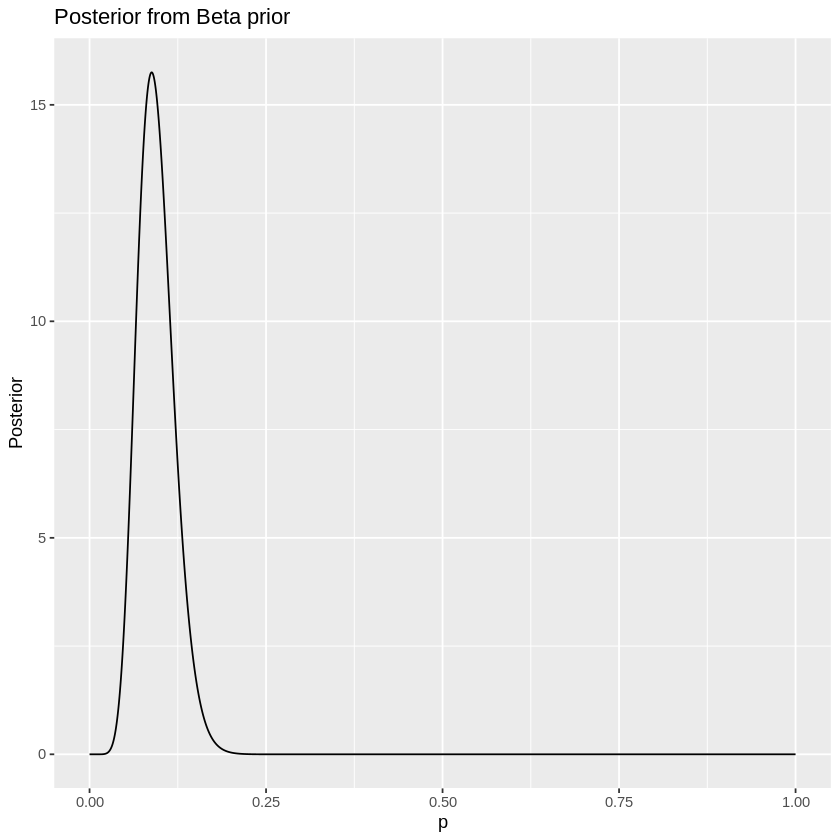

In [4]:
delta.t <- 0.0001
p <- seq(0, 1, by = delta.t) 

#Likelihood, Prior
p.beta_like <- dbinom(y, size=n, prob=p)
p.beta_prior <- dbeta(p, 1, 10)

#Posterior
p.beta_post <- (p.beta_like * p.beta_prior)/(delta.t * sum(p.beta_like * p.beta_prior))

#Plot
beta_post_plot <- ggplot() +
        geom_line(aes(x=p, y=p.beta_post)) +
        labs(x='p', y='Posterior', title='Posterior from Beta prior')
beta_post_plot

## 3.3)

mean,variance,lower_bound_credibility_interval,upperr_bound_credibility_interval
<dbl>,<dbl>,<dbl>,<dbl>
0.09448819,0.0006684388,0.0467,0.1459


Warning message:
“Removed 8000 rows containing missing values (`geom_line()`).”


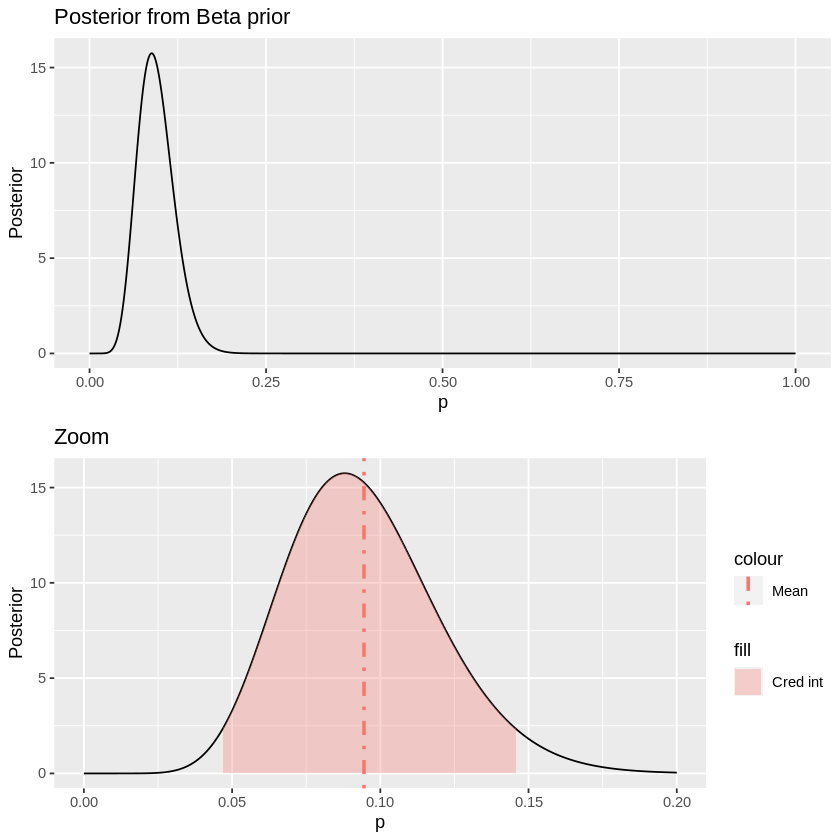

In [10]:
# Bayesian estimator for p 
Beta_mean <- (sum(p.beta_post * p)) * delta.t
Beta_var <- sum(((Beta_mean - p)^2) *p.beta_post) * delta.t
Beta_low <- ncredint(p, p.beta_post, level=0.95)[['lower']]
Beta_up <- ncredint(p, p.beta_post, level=0.95)[['upper']]

Beta_res <- tibble(
                mean = Beta_mean,
                variance = Beta_var,
                lower_bound_credibility_interval = Beta_low,
                upperr_bound_credibility_interval = Beta_up
                )
Beta_res

# zoomed plot
Beta_post_plot_zoom <- beta_post_plot + 
        geom_area(aes(x = p[p>Beta_low & p<Beta_up],
                      y = p.beta_post[p>Beta_low & p<Beta_up],   
                      fill='Cred int'), alpha=0.3) +
        geom_vline(aes(xintercept = Beta_mean, color='Mean'), linetype="dotdash", linewidth=1) +
        xlim(0, 0.2) +
        labs(title='Zoom')

grid.arrange(grobs=list(beta_post_plot, Beta_post_plot_zoom), nrow=2)

## 3.4)

### Bayesian approach

Is p = 0.1 inside the 95% credibility interval? TRUE , so I accept the null Hypotesis H0 and refuse H1.

Warning message:
“Removed 541 rows containing non-finite values (`stat_align()`).”
Warning message:
“Removed 9551 rows containing missing values (`geom_line()`).”


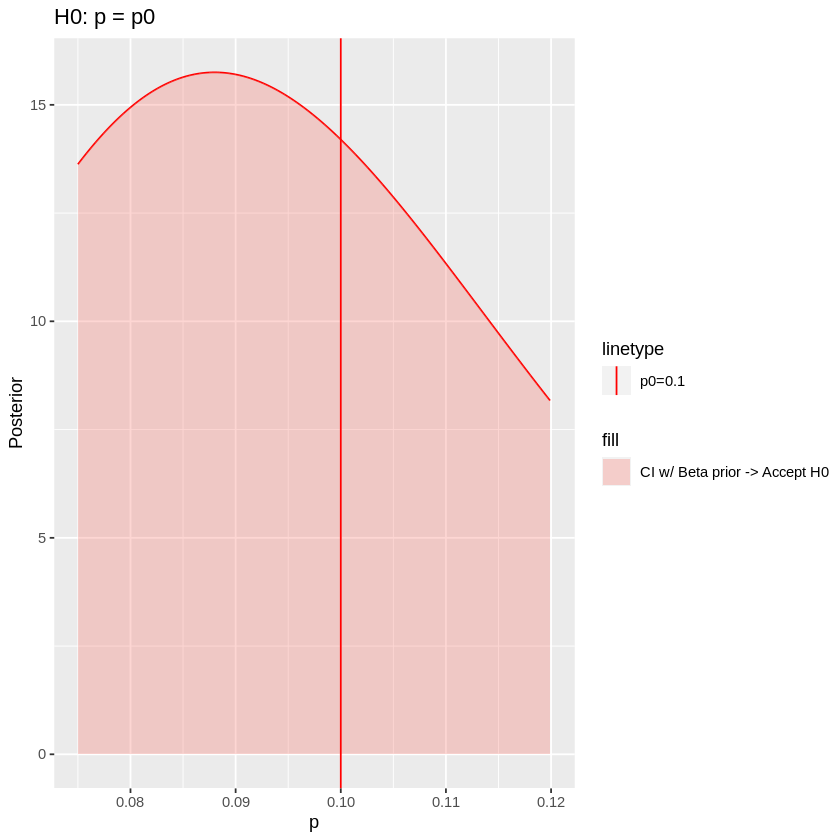

In [13]:
p0 <- 0.1
cat('Is p = 0.1 inside the 95% credibility interval?', p0 > Beta_low & p0 < Beta_up,', so I accept the null Hypotesis H0 and refuse H1.')

bayesian_ht <- ggplot()+
        geom_line(aes(p, p.beta_post), color='red') +
        geom_area(aes(x = p[p>Beta_low & p<Beta_up],
                      y = p.beta_post[p>Beta_low & p<Beta_up],   
                      fill='CI w/ Beta prior -> Accept H0'), alpha=0.3) +
        xlim(0.075, 0.12) + 
        labs(y = 'Posterior', title='H0: p = p0') +
        geom_vline(aes(xintercept=0.1, linetype='p0=0.1'), color='red')
bayesian_ht

### Frequentist approach

In [15]:
alpha=0.05
x <- seq(0, n, 1)
x.freq <- pbinom(x, size=n, prob = p0)

low <- max(x[x.freq <= alpha/2])
up <- min(x[x.freq >= 1-alpha/2])

alpha.limit = x.freq[low] + 1 - x.freq[up]
cat('The closest can get to alpha=0.05 is:', alpha.limit, '\n')
cat('The limits are:', '[', low, ',', up,']', '\n')
cat('Our number of succesful events = ', y, ' falls into the limits range, we CANNOT reject the null hypotesis H0')

The closest can get to alpha=0.05 is: 0.04761008 
The limits are: [ 5 , 18 ] 
Our number of succesful events =  11  falls into the limits range, we CANNOT reject the null hypotesis H0

## 3.5)

In [16]:
n <- 165
y <- 9

p_freq <- y/n
cat('The frequenties estimator is:', round(p_freq*100, 2), '%')

The frequenties estimator is: 5.45 %

## 3.6 - 3.7)

,Mean,Variance,Lower_bound_credibility_interval,Upper_bound_credibility_interval
,<dbl>,<dbl>,<dbl>,<dbl>
Prior: Beta,0.05681818,0.0003027677,0.0251,0.0914
Prior: Old posterior,0.07191781,0.0002278008,0.0436,0.0251


Warning message:
“Removed 7500 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 7500 rows containing missing values (`geom_line()`).”


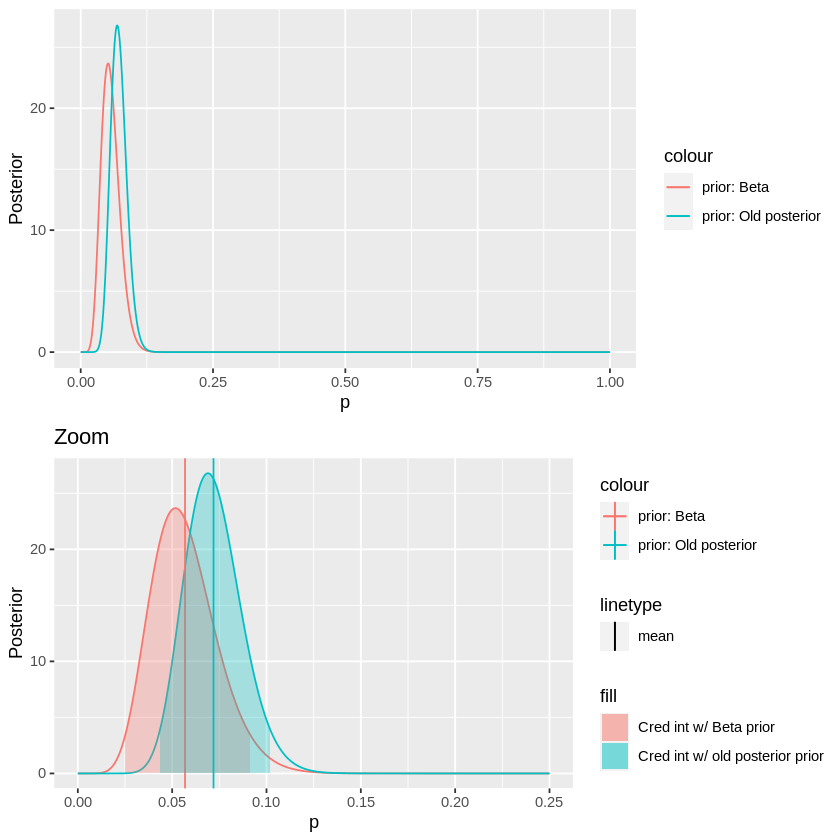

In [17]:
delta.t <- 0.0001
p <- seq(0, 1, by=delta.t)

#likelihood
p.like <- dbinom(y, n, prob=p)

#the two prior
p.beta_prior <- dbeta(p, 1, 10)
p.old_prior <- p.beta_post

#the two possible posterior 
p.beta_post <- (p.like * p.beta_prior) / (delta.t * sum(p.like * p.beta_prior))

p.old_post <- (p.like * p.old_prior) / (delta.t * sum(p.like * p.old_prior))

#find the two baiesian estimator for the two posterior 
beta_mean <- sum(p * p.beta_post) * delta.t
beta_var <- sum(((p-beta_mean)^2) * p.beta_post) * delta.t
beta_low <- ncredint(p, p.beta_post, level = 0.95)[['lower']]
beta_up <- ncredint(p, p.beta_post, level = 0.95)[['upper']]
beta_cred_int <- c(beta_low, beta_up)


old_mean <- sum(p * p.old_post) * delta.t
old_var <- sum(((p-old_mean)^2) * p.old_post) * delta.t
old_low <- ncredint(p, p.old_post, level=0.95)[['lower']]
old_up <- ncredint(p, p.old_post, level=0.95)[['upper']]
old_cred_int <- c(old_low, old_up) 

#print the result in a dataframe
result <- data.frame(
          Mean = c(beta_mean, old_mean),
          Variance = c(beta_var, old_var),
          Lower_bound_credibility_interval = c(beta_low, old_low),
          Upper_bound_credibility_interval = c(beta_up, beta_low),
          row.names = c('Prior: Beta', 'Prior: Old posterior')
)
result

#plot the two posterior 
prior_plot <- ggplot()+
        geom_line(aes(p, p.beta_post, color='prior: Beta')) +
        geom_line(aes(p, p.old_post, color='prior: Old posterior')) +
        labs(x='p', y='Posterior')

prior_plot_zoom <- prior_plot +
        geom_vline(aes(xintercept=beta_mean, color = 'prior: Beta', linetype='mean')) + 
        geom_area(aes(x = p[p>beta_low & p<beta_up],
                      y = p.beta_post[p>beta_low & p<beta_up],   
                      fill='Cred int w/ Beta prior'), alpha=0.3) +

        geom_vline(aes(xintercept=old_mean, color='prior: Old posterior', linetype='mean')) +
        geom_area(aes(x = p[p>old_low & p<old_up],
                      y = p.old_post[p>old_low & p<old_up],   
                      fill='Cred int w/ old posterior prior'), alpha=0.3) +
        xlim(0, 0.25) + 
        labs(title='Zoom')

grid.arrange(grobs=list(prior_plot, prior_plot_zoom), nrow=2)

## 3.8)

### Bayesian approach

Freq. approach: 
==> Is p=0.1 inside the 95% credibility interval, obtained w/ the Beta prior? FALSE -> We reject the null Hypotesis
Freq. approach: 
==> Is p=0.1 inside the 95% credibility interval, obtained w/ the old posterior as prior? TRUE -> We accept the null Hypotesis


Warning message:
“Removed 113 rows containing non-finite values (`stat_align()`).”
Warning message:
“Removed 298 rows containing non-finite values (`stat_align()`).”
Warning message:
“Removed 9050 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 9050 rows containing missing values (`geom_line()`).”


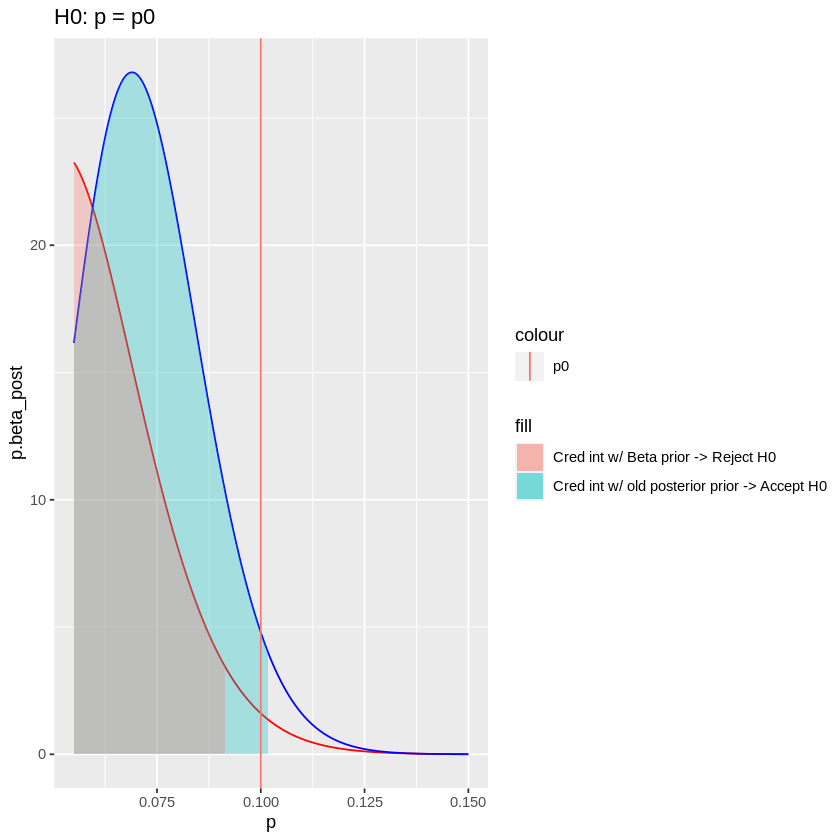

In [29]:
p0 <- 0.1
cat('Freq. approach: \n==> Is p=0.1 inside the 95% credibility interval, obtained w/ the Beta prior? ')
if(p0 > beta_low & p0 < beta_up){cat('TRUE -> We accept the null Hypotesis\n')} else {cat('FALSE -> We reject the null Hypotesis\n')}

cat('Freq. approach: \n==> Is p=0.1 inside the 95% credibility interval, obtained w/ the old posterior as prior? ') 
if(p0 > old_low & p0 < old_up){cat('TRUE -> We accept the null Hypotesis\n')} else {cat('FALSE -> We reject the null Hypotesis\n')}



twoprior_plot <- ggplot()+
        geom_line(aes(p, p.beta_post), color='red') +
        geom_line(aes(p, p.old_post), color='blue') +
        geom_area(aes(x = p[p>old_low & p<old_up],
                      y = p.old_post[p>old_low & p<old_up],   
                      fill='Cred int w/ old posterior prior -> Accept H0'), alpha=0.3) +
        geom_area(aes(x = p[p>beta_low & p<beta_up],
                      y = p.beta_post[p>beta_low & p<beta_up],   
                      fill='Cred int w/ Beta prior -> Reject H0'), alpha=0.3) +
        xlim(0.055, 0.15) + 
        labs(title='H0: p = p0') +
        geom_vline(aes(xintercept=0.1, color='p0')) 
twoprior_plot

### Frequentist approach

In [32]:
alpha=0.05
x <- seq(0, n, 1)
x.freq <- pbinom(x, size=n, prob = p0)

low <- max(x[x.freq <= alpha/2])
up <- min(x[x.freq >= 1-alpha/2])

alpha.limit = x.freq[low] + 1 - x.freq[up]
cat('The closest can get to alpha=0.05 is:', alpha.limit, '\n')
cat('The limits are:', '[', low, ',', up,']', '\n')
cat('Our number of succesful event = ', y, ' falls into the limits range, we CANNOT reject the null hypotesis H0.', '\n')
cat('It is important to notice that our measurement barely fall inside the confidence intervall')

The closest can get to alpha=0.05 is: 0.04532508 
The limits are: [ 8 , 24 ] 
Our number of succesful event =  9  falls into the limits range, we CANNOT reject the null hypotesis H0. 
It is important to notice that our measurement barely fall inside the confidence intervall

# 4)

## 3.2)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 1
   Unobserved stochastic nodes: 2
   Total graph size: 7

Initializing model


Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

     Mean      SD  Naive SE Time-series SE
Y 0.93770 0.95620 0.0095620      0.0095620
p 0.09416 0.02591 0.0002591      0.0002484

2. Quantiles for each variable:

     2.5%     25%     50%    75%  97.5%
Y 0.00000 0.00000 1.00000 1.0000 3.0000
p 0.04939 0.07578 0.09215 0.1102 0.1507



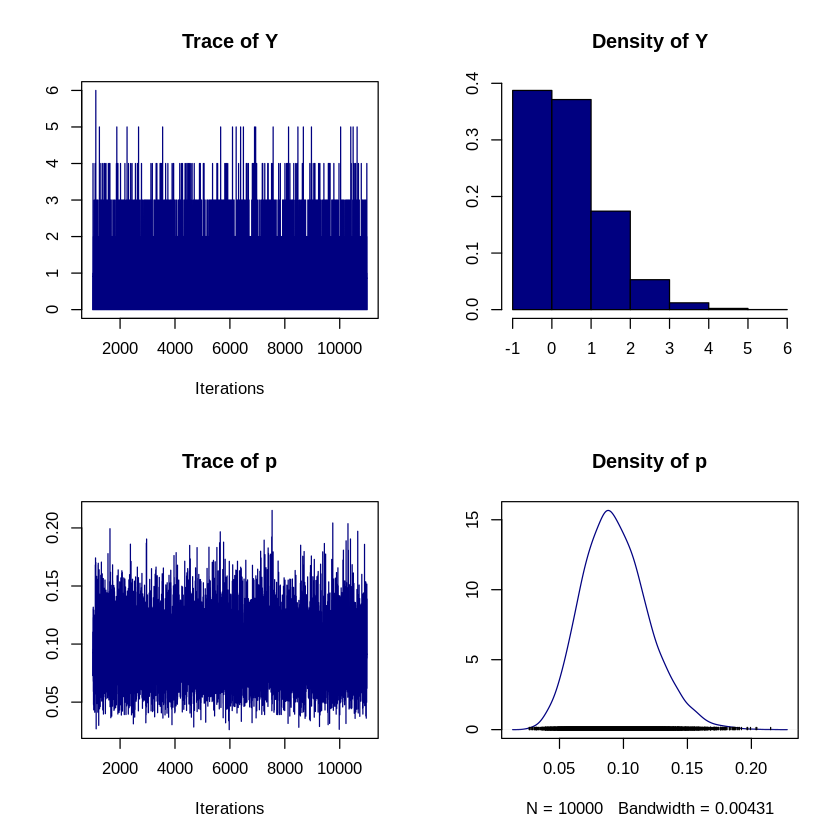

In [5]:
#define data and model
data <- NULL
data$X <- 11
data$n <- 116
data$n_next <- 10

model <- 's11_inf_p_pred.bug'
jags_model <- jags.model(model, data)

#update the chain
update(jags_model, 1000)
chain <- coda.samples(jags_model, c('p', 'Y'), n.iter = 10000)
print(summary(chain))

#plot the chain
plot(chain, col='navy')

Correlation matrix:          Y         p
Y 1.0000000 0.2884422
p 0.2884422 1.0000000


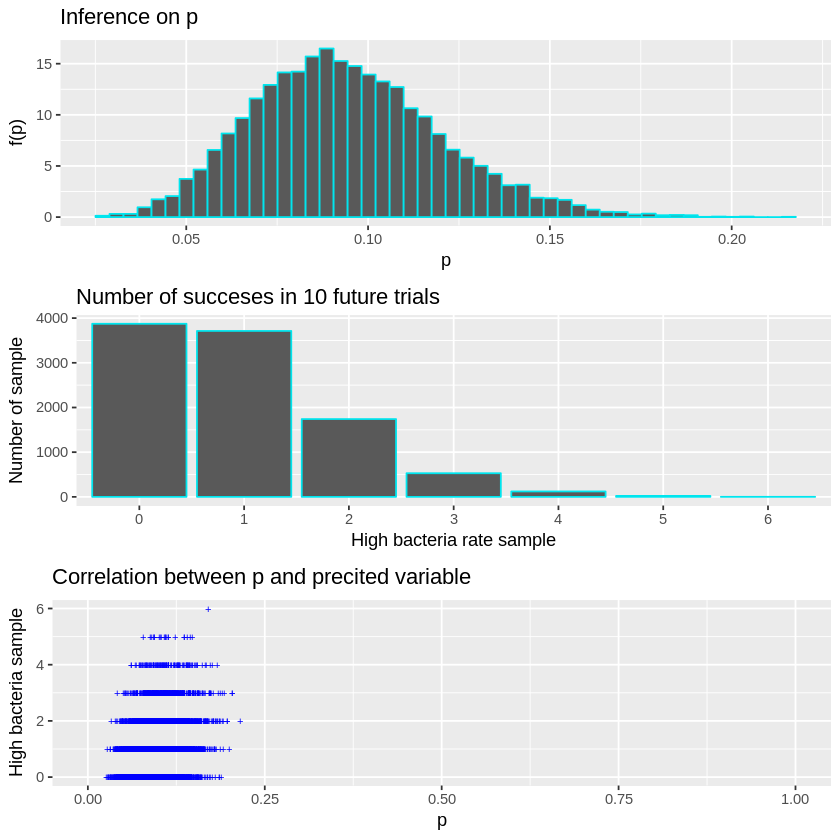

In [12]:
chain.df <- as.data.frame(as.mcmc(chain))
cat(sprintf('Correlation matrix:'))
print(cor(chain.df))

#p inference result 
inference_plot <- ggplot()+
        geom_histogram(aes(x=chain.df$p, y=..density..), color='turquoise2', bins=50)+
        labs(x='p', y='f(p)', title='Inference on p')

# next data prediction probability
ty <- as.data.frame(table(chain.df$Y))
data_pred <- ggplot()+
        geom_bar(aes(x = ty$Var1, y=ty$Freq), color='turquoise2', stat = 'identity')+
        labs(x='High bacteria rate sample', y='Number of sample', 
             title=sprintf('Number of succeses in %d future trials', data$n_next))

#Correlation between p and predicted variable
corr_plot <- ggplot(data=chain.df)+
        geom_point(aes(x=p, y=Y), shape='+', size=2, color='blue')+
        xlim(0, 1)+
        labs(x='p', y='High bacteria sample', title ='Correlation between p and precited variable')

grid.arrange(grobs=list(inference_plot, data_pred, corr_plot), nrow=3)

#### Comparing w/ the posterior from Ex. 3.2

Warning message:
“Removed 3 rows containing non-finite values (stat_bin).”Warning message:
“Removed 8000 rows containing missing values (geom_path).”

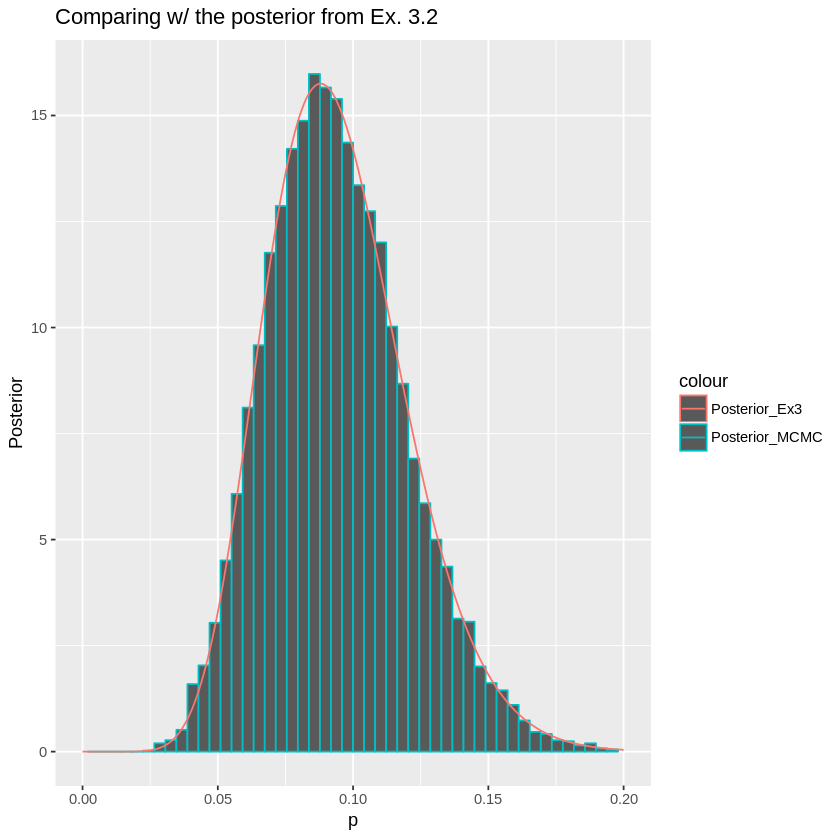

In [17]:
comp_ex3 <- ggplot()+
        geom_histogram(aes(x=chain.df$p, y=..density.., color='Posterior_MCMC'),  bins=50)+
        geom_line(aes(x=p, y=p.beta_post, color='Posterior_Ex3'))+
        labs(x='p', y='Posterior', title='Comparing w/ the posterior from Ex. 3.2')+
        xlim(0, 0.2)

comp_ex3

## 3.3)

In [18]:
summary(chain)


Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

     Mean      SD  Naive SE Time-series SE
Y 0.93770 0.95620 0.0095620      0.0095620
p 0.09416 0.02591 0.0002591      0.0002484

2. Quantiles for each variable:

     2.5%     25%     50%    75%  97.5%
Y 0.00000 0.00000 1.00000 1.0000 3.0000
p 0.04939 0.07578 0.09215 0.1102 0.1507


(cfr: https://cran.r-project.org/doc/Rnews/Rnews_2006-1.pdf#page=7)

mean,variance,lower_bound_credibility_interval,upper_bound_credibility_interval
0.09416,0.0006713281,0.04928994,0.150695


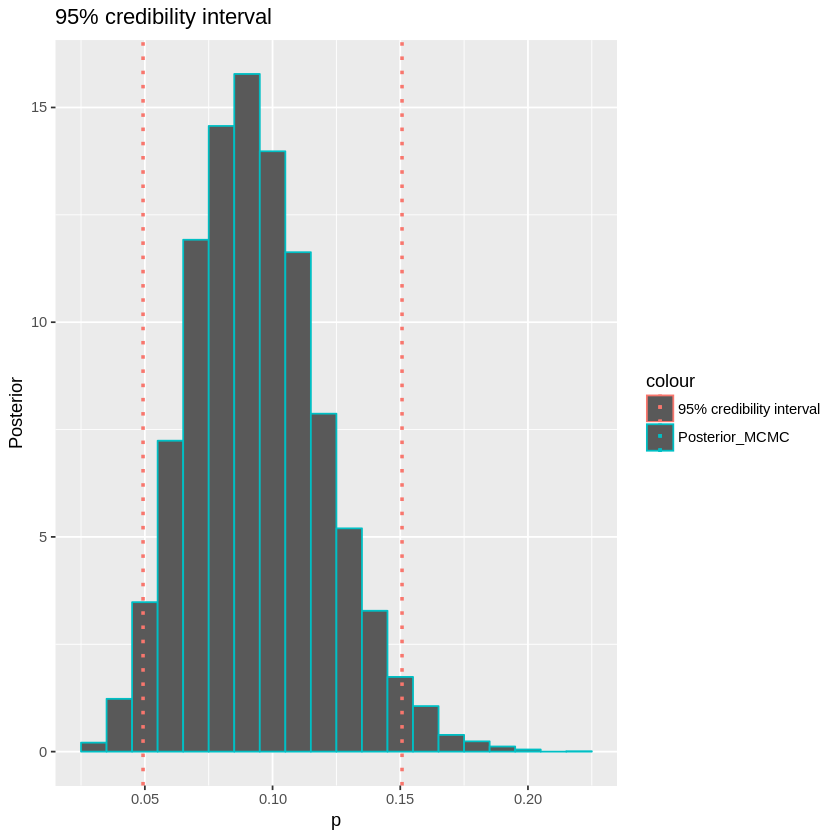

In [22]:
MCMC_mean <- 0.09416
MCMC_var <- (0.02591)^2

sorted_chain <- chain.df[order(chain.df$p),]$p
MCMC_low <- as.double(sorted_chain[250]) 
MCMC_up <- as.double(sorted_chain[9750])

result <- data.frame(
                    mean = MCMC_mean,
                    variance = MCMC_var,
                    lower_bound_credibility_interval = MCMC_low,
                    upper_bound_credibility_interval = MCMC_up
)
result

ggplot()+
geom_histogram(aes(x=chain.df$p, y=..density.., color='Posterior_MCMC'), binwidth = 0.01)+
geom_vline(aes(xintercept=MCMC_low, color='95% credibility interval'), linetype='dotted', size=1)+
geom_vline(aes(xintercept=MCMC_up, color='95% credibility interval'), linetype='dotted', size=1) +
labs(x='p', y='Posterior', title='95% credibility interval')